In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import cufflinks as cf

cf.go_offline()
data = pd.read_csv(r'C:\Users\Abhinay\Downloads\UCI_Credit_Card.csv')
pd.pandas.set_option('display.max_columns',None)
data
# No Null or missing Values in DataSet

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [10]:
# Removed invalid records from Training set only for achieving better results
from sklearn.model_selection import train_test_split
rel_features = data[data.columns[6:12]]

X = rel_features[rel_features.columns[0:6]]
Y = data[data.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.60)

X_train = X_train.merge(Y_train, left_index=True, right_index=True)

#Removal of invalid values from training est
X_train=X_train.loc[(X_train['PAY_0']!=0) & (X_train['PAY_0']!=-2) & (X_train['PAY_2']!=0) & (X_train['PAY_2']!=-2) & (X_train['PAY_3']!=0) & (X_train['PAY_3']!=-2) & (X_train['PAY_4']!=0) & (X_train['PAY_4']!=-2) & (X_train['PAY_5']!=0) & (X_train['PAY_5']!=-2) & (X_train['PAY_6']!=0) & (X_train['PAY_6']!=-2)]

Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:6]

# Learning Decision Tree

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

# Testing

In [12]:
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(Y_pred, Y_test)
print(score)

0.7998333333333333


In [13]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88     11053
           1       0.22      0.61      0.33       947

    accuracy                           0.80     12000
   macro avg       0.59      0.72      0.60     12000
weighted avg       0.90      0.80      0.84     12000



C:\Users\Abhinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

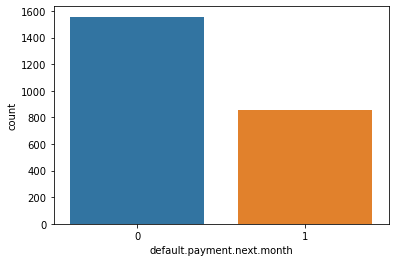

In [14]:
sns.countplot(Y_train)

<AxesSubplot:ylabel='default.payment.next.month'>

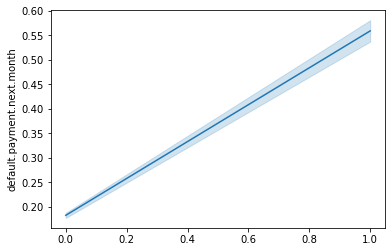

In [9]:

sns.lineplot(x=Y_pred,y=Y_test)